In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
FDF = pd.read_csv("Data/Foyer.csv",header=0)
PDF = pd.read_csv("Data/Programs.csv",header=0)

In [4]:
schools = FDF["school"].unique()

print(schools)

['Gibson Southern' 'Mater Dei' 'Reitz' 'North' 'ECS' 'Central' 'Castle'
 'Mt. Vernon' 'NTI' 'North Posey' 'Harrison' 'Day School' 'Boonville'
 'Wood Memorial' 'Virtual Academy' 'Other' 'Memorial' 'Tecumseh' 'Bosse'
 'Home School' 'Princeton' 'South Spencer' 'Boonville Christian']


# Cleaned Data


In [5]:
count = FDF.value_counts("school")
print (count)

school
Gibson Southern        65
North                  65
Reitz                  56
Mater Dei              55
Central                46
Castle                 39
NTI                    38
Harrison               25
North Posey            14
Boonville              12
Mt. Vernon             12
ECS                    11
Bosse                  10
Princeton               9
Home School             7
Memorial                7
Tecumseh                7
Other                   6
Virtual Academy         6
South Spencer           5
Wood Memorial           4
Day School              1
Boonville Christian     1
Name: count, dtype: int64


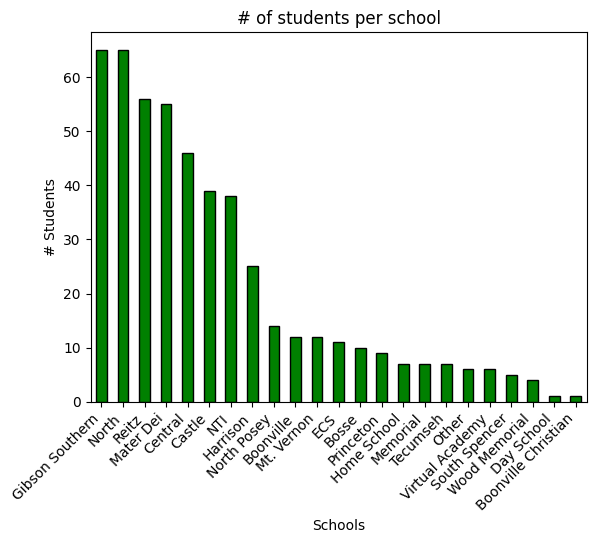

In [6]:
count.plot(kind="bar", color="green", edgecolor="black")
plt.xlabel("Schools")
plt.ylabel("# Students")
plt.xticks(rotation=45, ha="right") 
plt.title("# of students per school")
plt.show()

# Cleaning data
- S269? --> S269
- C1C? --> C1C
- NAN --> Deleted

In [7]:
programs = PDF["program"].unique()
print(programs)

['Welding Technology' 'Architecture and Engineering Design Technology'
 'Diesel Service Technology' 'Health Science: Pre-Professional'
 'Media Communications and Broadcasting' 'Electrical Technology'
 'Automotive Service Technology'
 'Precision Machine Metalworking Technology'
 'Building Construction Technology' 'Graphic Communications Digital Media'
 'Public Safety Criminal Justice' 'Health Science: Exercise Science'
 'HVAC -R and Energy Systems' 'Automotive Collision Repair Technology'
 'Culinary Arts' 'Computer Science Software Development'
 'Advanced Manufacturing Technology' 'Cyber Security' 'Veterinary Science']


In [8]:
pcount = PDF.value_counts("program")
print(pcount)

program
Health Science: Pre-Professional                  138
Diesel Service Technology                          82
Architecture and Engineering Design Technology     82
HVAC -R and Energy Systems                         78
Welding Technology                                 74
Electrical Technology                              71
Automotive Service Technology                      62
Building Construction Technology                   55
Culinary Arts                                      54
Veterinary Science                                 52
Automotive Collision Repair Technology             52
Precision Machine Metalworking Technology          37
Advanced Manufacturing Technology                  36
Public Safety Criminal Justice                     35
Media Communications and Broadcasting              27
Computer Science Software Development              17
Cyber Security                                     17
Graphic Communications Digital Media               15
Health Science: Exer

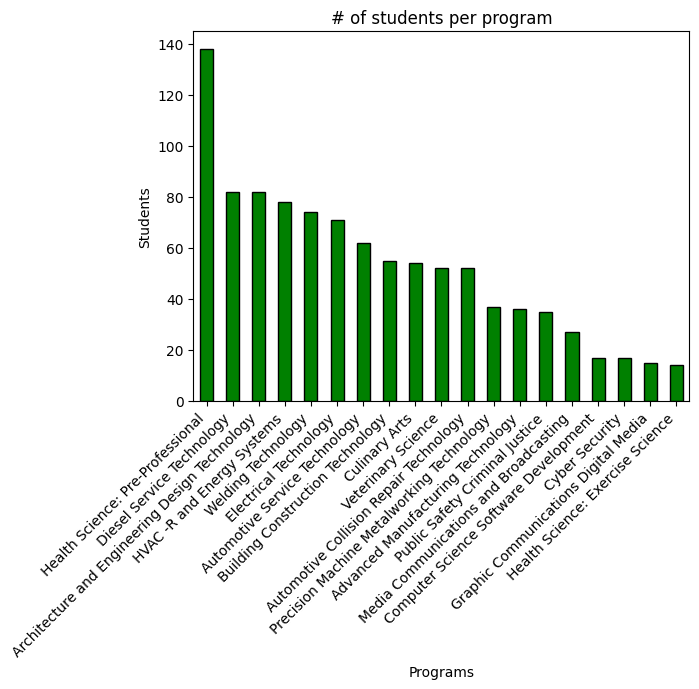

In [9]:
pcount.plot(kind="bar", color="green", edgecolor="black")
plt.xlabel("Programs")
plt.ylabel("Students")
plt.xticks(rotation=45, ha="right") 
plt.title("# of students per program")
plt.show()

In [10]:
# Found via library
merged = FDF.merge(PDF, on="id", how="inner", )

# print(merged[["firstName","lastName","program"]])
StudsByPrograms = merged.groupby("program")["emailAddress"].apply(list)
print(StudsByPrograms)

program
Advanced Manufacturing Technology                 [aesbrookk@mayoclinic.com, crapley2c@hostgator...
Architecture and Engineering Design Technology    [tbrandacci8@fema.gov, bblinckhorneg@tiny.cc, ...
Automotive Collision Repair Technology            [rkeddy4@tripadvisor.com, vwhitticks5@scienced...
Automotive Service Technology                     [vwhitticks5@sciencedirect.com, vwhitticks5@sc...
Building Construction Technology                  [vwhitticks5@sciencedirect.com, chellyere@harv...
Computer Science Software Development             [tbrandacci8@fema.gov, hroache9@independent.co...
Culinary Arts                                     [mceccoli1c@who.int, mceccoli1c@who.int, rwood...
Cyber Security                                    [tbrandacci8@fema.gov, avaugham13@istockphoto....
Diesel Service Technology                         [vwhitticks5@sciencedirect.com, vwhitticks5@sc...
Electrical Technology                             [rkeddy4@tripadvisor.com, vwhitticks5@scie

In [11]:
StudsByPrograms = merged.groupby("program")["school"].apply(list)
print(StudsByPrograms)

program
Advanced Manufacturing Technology                 [Reitz, Tecumseh, North, NTI, Reitz, Gibson So...
Architecture and Engineering Design Technology    [Reitz, Reitz, Castle, Central, North Posey, N...
Automotive Collision Repair Technology            [Reitz, Mater Dei, Mater Dei, Mater Dei, Gibso...
Automotive Service Technology                     [Mater Dei, Mater Dei, Mater Dei, Gibson South...
Building Construction Technology                  [Mater Dei, Central, Castle, Reitz, NTI, Harri...
Computer Science Software Development             [Reitz, Mater Dei, Mater Dei, Tecumseh, Reitz,...
Culinary Arts                                     [Mater Dei, Mater Dei, Mater Dei, Mater Dei, G...
Cyber Security                                    [Reitz, Mater Dei, Reitz, Tecumseh, Harrison, ...
Diesel Service Technology                         [Mater Dei, Mater Dei, Mater Dei, Gibson South...
Electrical Technology                             [Reitz, Mater Dei, ECS, Central, Reitz, Ha

In [12]:
count = []
attendence = []
school = []
pgram = []

In [13]:
for eachSchool in schools:
    for eachProgram in StudsByPrograms.items():
        program = eachProgram[0]
        schoolList = list(eachProgram[1])
        pgram.append(program)
        attendence.append(schoolList.count(eachSchool))
        school.append(eachSchool)
        count.append(f"{program}: {eachSchool}({schoolList.count(eachSchool)})\n")


In [31]:
print(attendence)
print(school)
print(pgram)

[2, 7, 11, 6, 3, 5, 2, 3, 12, 5, 0, 1, 2, 26, 2, 2, 7, 6, 11, 5, 6, 9, 8, 11, 2, 7, 1, 12, 9, 2, 35, 2, 14, 4, 9, 6, 3, 12, 3, 10, 9, 6, 10, 5, 7, 3, 9, 12, 2, 18, 1, 14, 5, 5, 1, 5, 14, 11, 11, 3, 8, 5, 1, 6, 2, 12, 6, 2, 5, 1, 14, 3, 5, 3, 8, 10, 0, 1, 0, 5, 0, 0, 6, 0, 2, 1, 0, 1, 0, 6, 0, 0, 1, 2, 1, 3, 5, 4, 4, 3, 0, 4, 0, 6, 6, 3, 9, 1, 21, 1, 2, 3, 6, 3, 1, 13, 3, 5, 4, 1, 2, 2, 7, 4, 1, 2, 0, 3, 0, 3, 0, 2, 5, 0, 1, 1, 1, 1, 0, 4, 0, 3, 2, 0, 1, 0, 2, 1, 0, 3, 0, 1, 4, 2, 7, 8, 7, 0, 5, 1, 13, 14, 1, 6, 2, 14, 4, 5, 13, 2, 9, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 0, 1, 0, 6, 0, 0, 0, 0, 4, 3, 0, 5, 1, 3, 3, 0, 12, 0, 3, 0, 0, 0, 8, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 1, 2, 0, 4, 0, 5, 1, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [33]:
#I learned the lamda function on my own during first semester some time, and it's just being used to show what to sort the list by here. sorting by program, and attendence in the program in reverse order
# Zip just combines lists Which i also learned sometime before this class.
i=0
for p, s, a in sorted(list(zip(pgram,school,attendence)), key=lambda x: (x[0],-x[2]),reverse=False):
    i += 1
    print(f"Program: {p}, School: {s}, Attendance: {a}")
    if not(i % 23):
        print()
print(len(schools))

Program: Advanced Manufacturing Technology, School: North, Attendance: 11
Program: Advanced Manufacturing Technology, School: Mater Dei, Attendance: 5
Program: Advanced Manufacturing Technology, School: NTI, Attendance: 4
Program: Advanced Manufacturing Technology, School: Reitz, Attendance: 3
Program: Advanced Manufacturing Technology, School: Central, Attendance: 3
Program: Advanced Manufacturing Technology, School: Boonville, Attendance: 3
Program: Advanced Manufacturing Technology, School: Gibson Southern, Attendance: 2
Program: Advanced Manufacturing Technology, School: Castle, Attendance: 1
Program: Advanced Manufacturing Technology, School: Memorial, Attendance: 1
Program: Advanced Manufacturing Technology, School: Tecumseh, Attendance: 1
Program: Advanced Manufacturing Technology, School: Bosse, Attendance: 1
Program: Advanced Manufacturing Technology, School: South Spencer, Attendance: 1
Program: Advanced Manufacturing Technology, School: ECS, Attendance: 0
Program: Advanced M

In [17]:
print(list(zip(pgram,school,attendence)))
data = list(zip(pgram, school, attendence))

[('Advanced Manufacturing Technology', 'Gibson Southern', 2), ('Architecture and Engineering Design Technology', 'Gibson Southern', 7), ('Automotive Collision Repair Technology', 'Gibson Southern', 11), ('Automotive Service Technology', 'Gibson Southern', 6), ('Building Construction Technology', 'Gibson Southern', 3), ('Computer Science Software Development', 'Gibson Southern', 5), ('Culinary Arts', 'Gibson Southern', 2), ('Cyber Security', 'Gibson Southern', 3), ('Diesel Service Technology', 'Gibson Southern', 12), ('Electrical Technology', 'Gibson Southern', 5), ('Graphic Communications Digital Media', 'Gibson Southern', 0), ('HVAC -R and Energy Systems', 'Gibson Southern', 1), ('Health Science: Exercise Science', 'Gibson Southern', 2), ('Health Science: Pre-Professional', 'Gibson Southern', 26), ('Media Communications and Broadcasting', 'Gibson Southern', 2), ('Precision Machine Metalworking Technology', 'Gibson Southern', 2), ('Public Safety Criminal Justice', 'Gibson Southern', 7)

In [19]:
uniquePrograms = sorted(set(pgram))  
uniqueSchools = sorted(set(school))  

In [20]:
# Create a dictionary Chat gpt assisted with dictionary comprehension
attendanceDict = {program: {s: 0 for s in uniqueSchools} for program in uniquePrograms}


In [22]:
for prog, sch, att in data:
    attendanceDict[prog][sch] += att  


xLabels = uniquePrograms  
x = np.arange(len(xLabels)) 


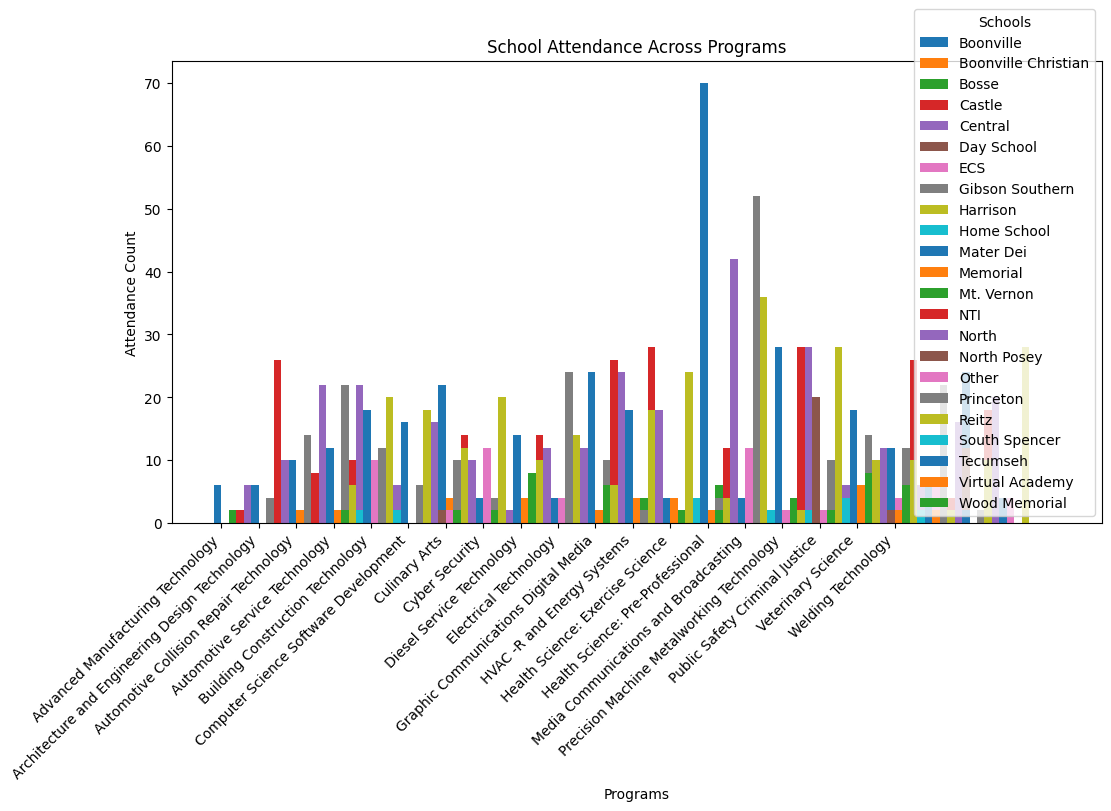

In [30]:
fig, ax = plt.subplots(figsize=(12, 6)) 
for i, sch in enumerate(uniqueSchools):
    yValues = [attendanceDict[prog][sch] for prog in xLabels]  # Get attendance per program
    ax.bar(x + i * .2, yValues, width=.2, label=sch) 
    
ax.set_xlabel("Programs")
ax.set_ylabel("Attendance Count")
ax.set_title("School Attendance Across Programs")
ax.set_xticks(x + .2 / 2)  # Center x-axis labels
ax.set_xticklabels(xLabels, rotation=45, ha="right")  # Rotate labels for readability
ax.legend(title="Schools")  # Add legend for schools
plt.show()  # Display the plot